In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### Import Data Analysis Libraries

In [12]:
import pandas as pd
import numpy as np

### Import Visualization Libraries

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data
import missingno as msno # Missing Data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline

### Import Sklean (Machine learning framework in Python)

In [14]:
from sklearn.preprocessing import StandardScaler, normalize  # Helps us in Standardizing the data
from sklearn.metrics import f1_score, average_precision_score # Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.impute import SimpleImputer                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # Oversampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score

### Miscellaneous

In [16]:
import time
from datetime import datetime
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Import data

In [2]:
df = pd.read_csv('KDDTrain+.txt')
test_df = pd.read_csv('KDDTest+.txt')

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [6]:
df.to_csv('file2.csv', header=True)

In [5]:
data=pd.read_csv('Book1.csv')

In [6]:
print(data['attack_flag'].value_counts())

0    67342
1    58630
Name: attack_flag, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


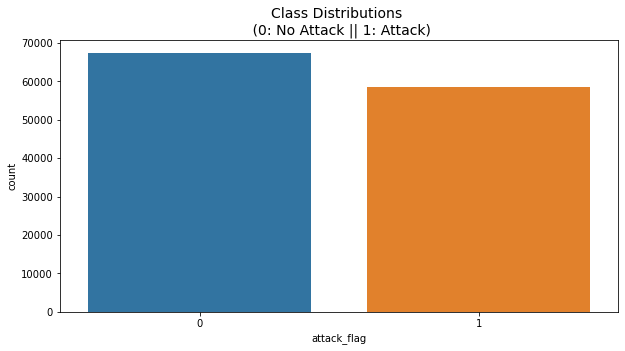

In [8]:
# Checking labels distributions
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(data['attack_flag'])
plt.title('Class Distributions \n (0: No Attack || 1: Attack)', fontsize=14)
plt.show()

In [9]:
def pearson_corr(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr(method="pearson")
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

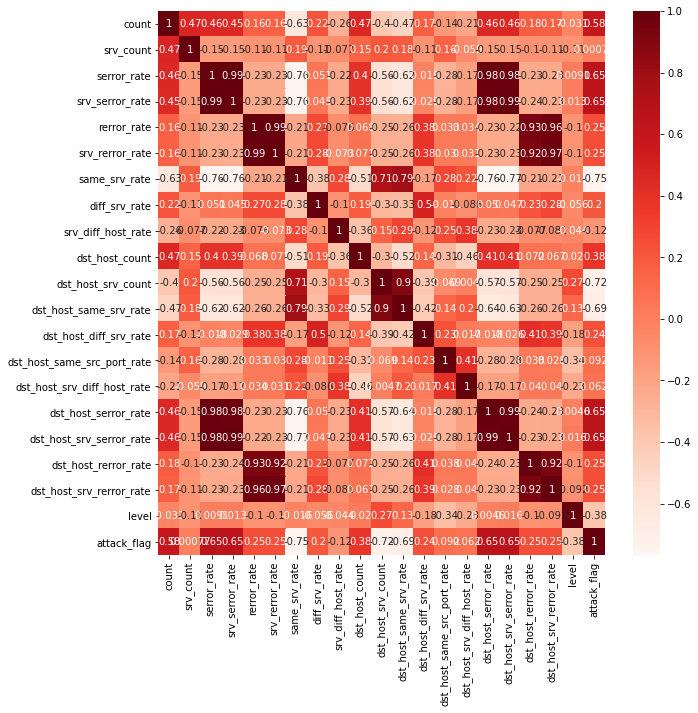

count                       0.576442
serror_rate                 0.650651
srv_serror_rate             0.648287
same_srv_rate               0.751912
dst_host_srv_count          0.722546
dst_host_same_srv_rate      0.693813
dst_host_serror_rate        0.651840
dst_host_srv_serror_rate    0.654984
attack_flag                 1.000000
Name: attack_flag, dtype: float64


In [10]:
pearson_corr(10,10,data,'attack_flag',0.5)

## Column Rename 

In [34]:
# Set the column headers from X1 ... X6 and the class label as Y, for dataframe.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes.columns)-1)]
    cols.append('Y')
    dataframes.columns = cols

set_new_headers(data)

# print the first 5 rows of a dataset
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,Y
0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


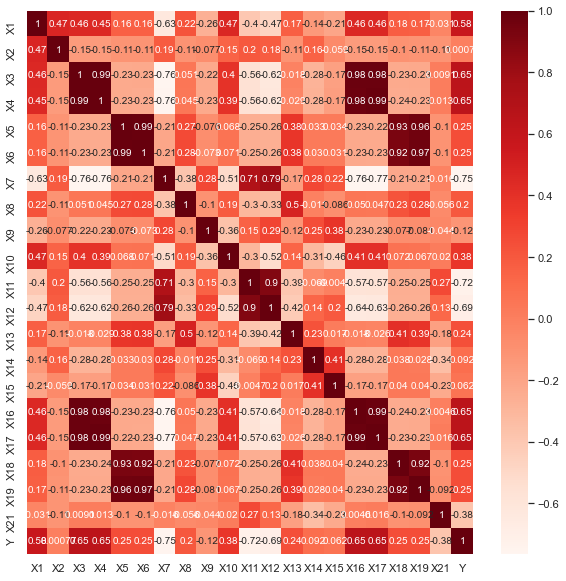

X1     0.576442
X3     0.650651
X4     0.648287
X7     0.751912
X11    0.722546
X12    0.693813
X16    0.651840
X17    0.654984
Y      1.000000
Name: Y, dtype: float64


In [36]:
pearson_corr(10,10,data,'Y',0.5)

### Using 8 features

In [47]:
temp=[data['X1'],data['X3'],data['X4'],data['X7'],data['X11'],data['X12'],data['X16'],data['X17'],data['Y']]
headers = ['X1','X3','X4','X7','X11','X12','X16','X17','Y']

f_data = pd.concat(temp, axis=1, keys=headers)

In [49]:
f_data.head()

,X1,X3,X4,X7,X11,X12,X16,X17,Y
0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,0
1,123,1.0,1.0,0.05,26,0.10,1.00,1.00,1
2,5,0.2,0.2,1.00,255,1.00,0.03,0.01,0
3,30,0.0,0.0,1.00,255,1.00,0.00,0.00,0
4,121,0.0,0.0,0.16,19,0.07,0.00,0.00,1


In [50]:
# detect the missing values
f_data.isna()
count = f_data.isna().sum()
count

X1     0
X3     0
X4     0
X7     0
X11    0
X12    0
X16    0
X17    0
Y      0
dtype: int64

##  Data Models

### A. LOGISTIC REGRESSION 

In [51]:
logit = LogisticRegression()

In [52]:
df=f_data

In [65]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =0)

In [66]:
logit.fit(x_train, y_train);

In [67]:
logit.score(x_test,y_test)

0.8900296359017782

### Predicting using the model

In [68]:
y_pred = logit.predict(x_test)

### Metric Results

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test,y_pred)

0.8900296359017782

In [70]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
resultmodel(logit,x_test,y_test)

R2 score:

55.79 %


Mean-squared error:

0.10997036409822185


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     20240
           1       0.91      0.84      0.88     17552

    accuracy                           0.89     37792
   macro avg       0.89      0.89      0.89     37792
weighted avg       0.89      0.89      0.89     37792



### ROC Curve

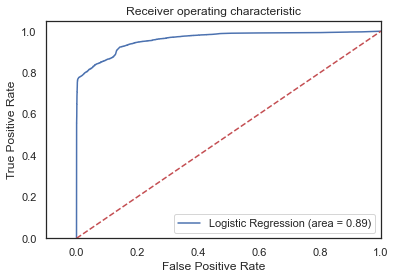

In [72]:
logit_roc_auc = roc_auc_score(y_test, logit.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

<AxesSubplot:>

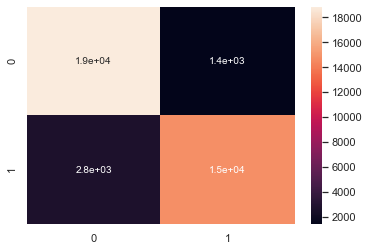

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## B. Naive Bayes Classifier

In [74]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [75]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
nb_pred = gnb.predict(x_test)

In [76]:
accuracy_score(y_test,nb_pred)

0.8792072396274344

In [77]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test,pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(gnb,x_test,y_test)


R2 score:

51.44 %


Mean-squared error:

0.12079276037256562


### Report

In [78]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     20240
           1       0.93      0.80      0.86     17552

    accuracy                           0.88     37792
   macro avg       0.89      0.87      0.88     37792
weighted avg       0.89      0.88      0.88     37792



### ROC Curve

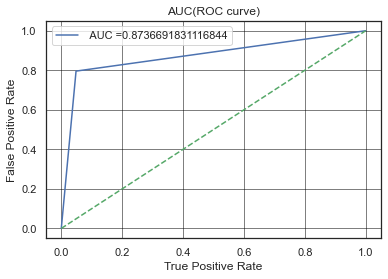

In [79]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, nb_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

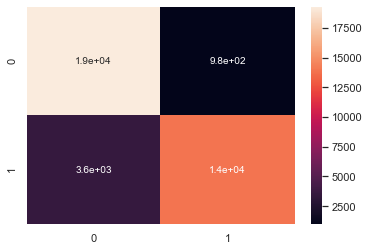

In [80]:

sns.heatmap(confusion_matrix(y_test,nb_pred,), annot=True)

## C. Random Forest

In [81]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [82]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)

rf_pred=rf.predict(x_test)

In [83]:
accuracy_score(y_test,rf_pred)


0.9485076206604572

In [84]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(rf,x_test,y_test)

R2 score:

79.30 %


Mean-squared error:

0.05149237933954276


### Report

In [85]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20240
           1       0.94      0.95      0.95     17552

    accuracy                           0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792



### ROC Curve

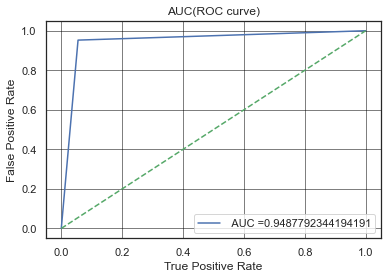

In [86]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, rf_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

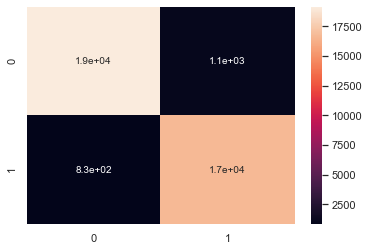

In [87]:

sns.heatmap(confusion_matrix(y_test,rf_pred,), annot=True)

### Random Forest Tree Visualization

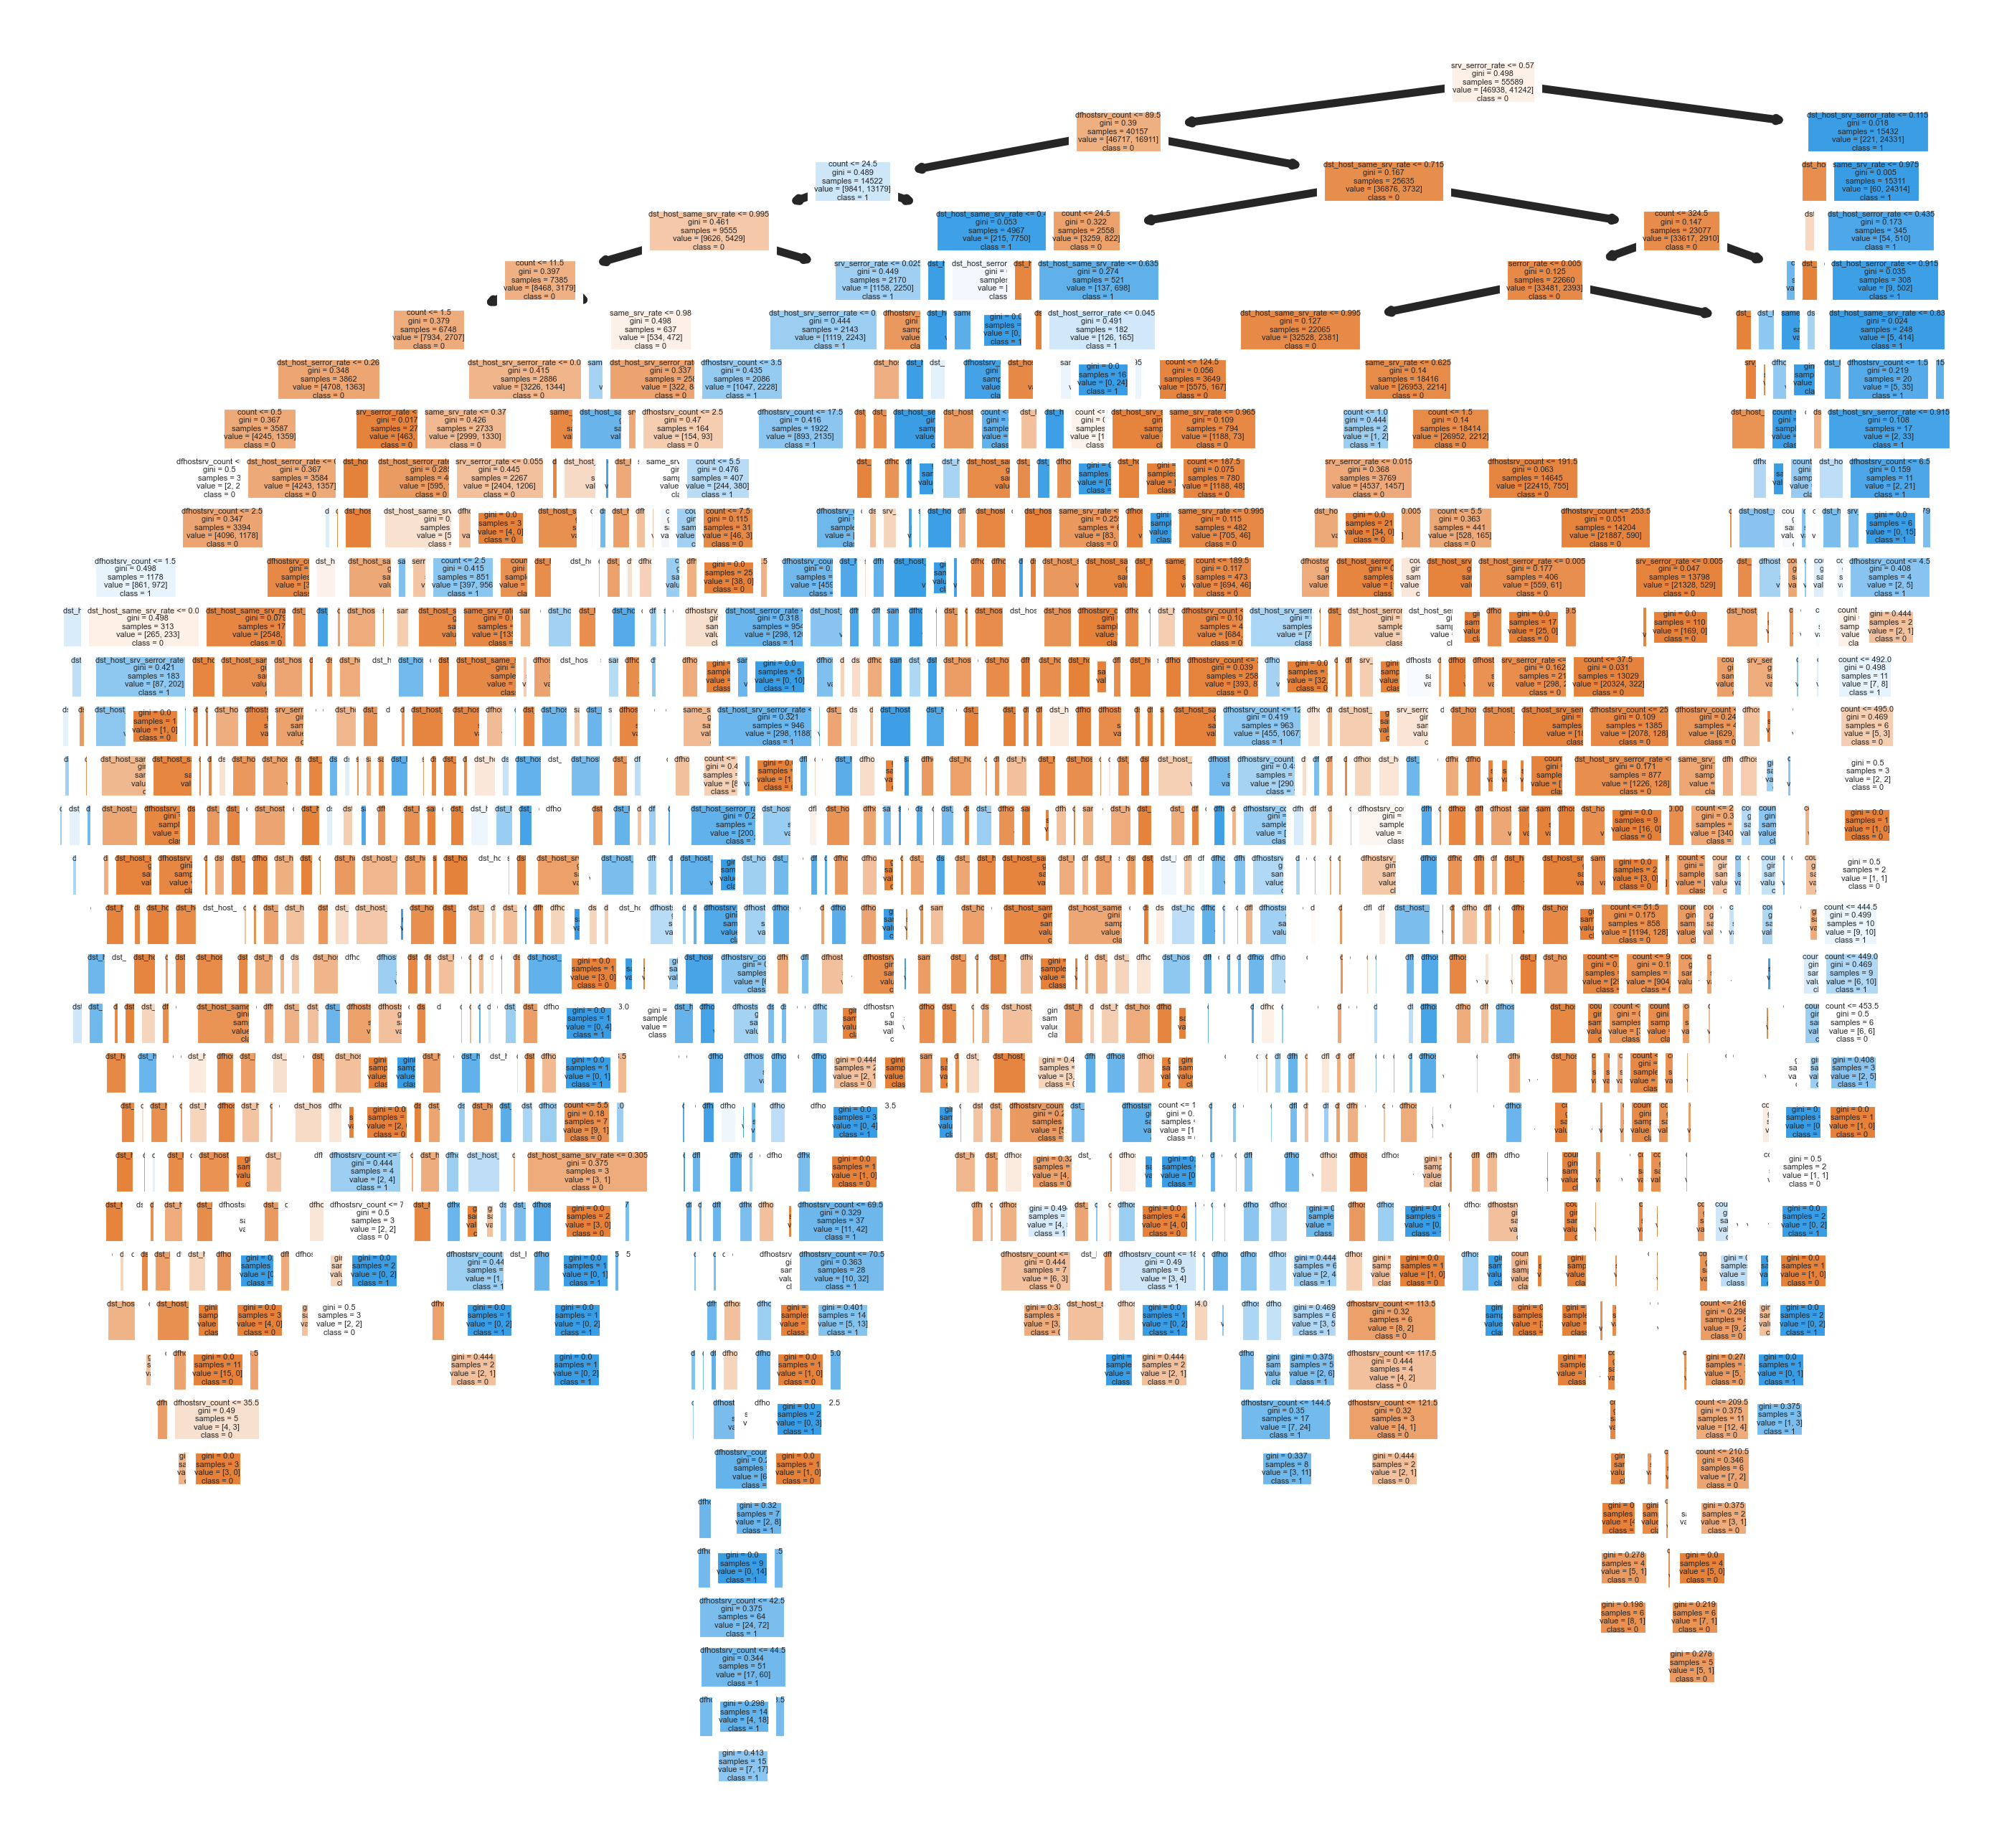

In [110]:
from sklearn import tree
feature_cols=['count','serror_rate','srv_serror_rate','same_srv_rate','dfhostsrv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);
fig.savefig('rf_individualtree.png')

## D. Decision Tree Classifier using Stratified Sampling

In [97]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split

y = df['Y']

# Dropping 

x = df.drop(['Y'], axis = 1)

# Splitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 999)


In [98]:

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="gini",splitter="best" ,max_depth=8)

# Train Decision Tree Classifer
dtc = dtc.fit(x_train,y_train)

#Predict the response for test dataset
dt_pred = dtc.predict(x_test)


In [99]:
accuracy_score(y_test,dt_pred)

0.9421835309060118

In [100]:
def resultmodel(model,x_test,y_test):

    # Use the model on the testing data to predict the results

    pred = model.predict(x_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test,pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, pred))
    


resultmodel(dtc,x_test,y_test)


R2 score:

76.76 %


Mean-squared error:

0.057816469093988146


### Report

In [101]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20231
           1       0.93      0.95      0.94     17561

    accuracy                           0.94     37792
   macro avg       0.94      0.94      0.94     37792
weighted avg       0.94      0.94      0.94     37792



### ROC Curve

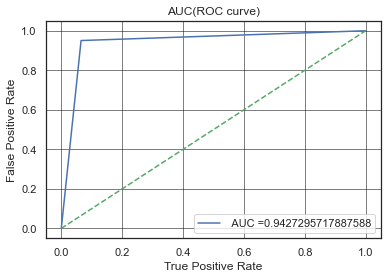

In [102]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, dt_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Confusion Matrix

<AxesSubplot:>

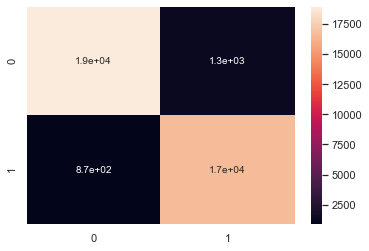

In [103]:

sns.heatmap(confusion_matrix(y_test,dt_pred,), annot=True)

### Decision Tree Visualization

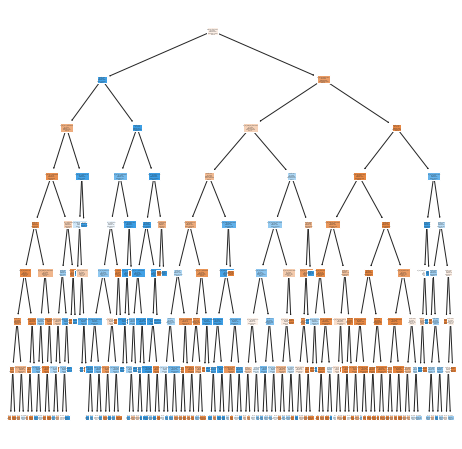

In [108]:
from sklearn import tree
feature_cols=['count','serror_rate','srv_serror_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate']
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(dtc, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("decistion_tree_s.png")

## Summary

From this, we infer that <b>Random Forest</b> model gives more accuracy than other models.